

[STAGE]:KNN MODEL
[INFO]:DataPath Read
[INFO]:DataFrame Returned
[INFO]:Trying kNearest for 4 neighbours
[INFO]:kFold validation DONE
[INFO]:kFold validation accuracy scores:
[OUTPUT]:kNearestNeighbours Accuracy: 97.41379310344827
[OUTPUT]:kNearestNeighbours Accuracy: 96.55172413793103
[OUTPUT]:kNearestNeighbours Accuracy: 98.27586206896551
[OUTPUT]:kNearestNeighbours Accuracy: 97.41379310344827
[OUTPUT]:kNearestNeighbours Accuracy: 98.27586206896551
[OUTPUT]:kNearestNeighbours Accuracy: 98.27586206896551
[INFO]:kFold validation TOTAL accuracy scores:97.70114942528734 %
[INFO]:MixMax Scaling
[INFO]:MixMax Scaling
[ERROR]:Confusion Matrix cannot be generated when k-fold = TRUE

[STAGE]:ANN MODEL WITH KFOLD VALIDATION
[INFO]:DataPath Read
[INFO]:DataFrame Returned
[INFO]:Running the Artificial Neural Network
[INFO]:NOT Implementing kFold Validation on ANN
[INFO]:MixMax Scaling
[INFO]:Number of rows trained on: 489
[INFO]:Number of rows tested on: 210
[OUTPUT]:Neural Network Accuracy: 8

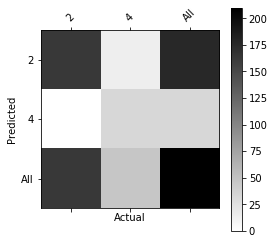

In [3]:
import numpy as np 
from collections import Counter #for the votes
import math
import pandas as pd #to load in the dataset
import random #to shuffle the data
from numpy import exp, array, random, dot
import warnings
warnings.filterwarnings("ignore")
from random import seed
from random import randrange
import matplotlib.pyplot as plt

#lets start by defining a class
class classificationModels():

    def __init__(self):
        self.neuralnet_accuracy = 0
        self.knn_accuracy = 0
        self.knn_all = []

    def importDataset(self,path):
        try:
            print("[INFO]:DataPath Read")
            df = pd.read_csv("breast_cancer_mode_replaced.csv")
            df = df.drop("Sample code number", axis=1)
            df = df.drop(df.columns[0],axis=1)
            user_dataframe = df.astype(int).values.tolist()  #converting the entire dataframe to int 
            print("[INFO]:DataFrame Returned")
            return user_dataframe
        
        except:
            print("[INFO]:Unknown Error Occurred")

        pass

    def euclideanDist(self,values, predict): #used to find the euclidean Distance betweeen the predicted value and the given
        d = 0.0 
        for i in range(len(values)-1):
            d += pow((float(values[i])-float(predict[i])),2)
        d = math.sqrt(d)
        return d

    #a function to shuffle the data and then split it up
    def shuffle(self,entire_data):
        test=int(0.3*len(entire_data)) #30% test size
        random.shuffle(entire_data)
        train_data = entire_data[:-test]
        test_data = entire_data[-test:]
        return train_data, test_data



    def knn_logic(self,data, predict,k=4):
        distances = []
        #group as in class and features as in the values
        for group in data:   
            for values in data[group]:     
                euclidean_distance =self.euclideanDist(values, predict) #defined a function to find the distance
                distances.append([euclidean_distance,group])   #list of lists.
                d=sorted(distances)
        votes = [i[1] for i in d[:k]]   #after the distances we only care about the distances to K
        result = Counter(votes).most_common(1)[0][0] 
        return result



    def kNearest(self,entire_data,k_neighs,kfold=False,k_fold_val=0):
        #shuffle the data, and then split it up:
        print("[INFO]:Trying kNearest for {} neighbours".format(k_neighs))
        if(kfold==False):
            #shuffle the data, and then split it up:
            train_data,test_data=self.shuffle(entire_data)
            print("[INFO]:kFold validation NOT DONE")
            predicted_values = self.kNearest_main(train_data,test_data,k_neighs) #last argument is the number of neighbours
            return predicted_values

        else:
            self.knn_accuracy = 0
            print("[INFO]:kFold validation DONE")
            #we need to call the K fold function
            fold = self.cross_validation_split(entire_data,k_fold_val)
            #now our train data can be each of the folds 
            print("[INFO]:kFold validation accuracy scores:")
            for i in range(0,len(fold)):
                test_data = fold[i]
                temp = fold[:]
                temp.remove(temp[i])
                train_data = []
                for i in temp:
                    train_data.extend(i)
                self.kNearest_main(train_data,test_data,k_neighs)
            print("[INFO]:kFold validation TOTAL accuracy scores:{} %".format((self.knn_accuracy)/k_fold_val))
            return None

    def kNearest_main(self,train_data,test_data,k_neighs):
        #These are the dictionaries that we are going to populate
        train_set = {2:[], 4:[]} 
        test_set = {2:[], 4:[]}

        for ii in train_data:
            train_set[ii[-1]].append(ii[:-1])

        for ii in test_data:
            test_set[ii[-1]].append(ii[:-1])

        right = 0
        final_votes = []
        total =len(test_data)
        for group in test_set:
            for data in test_set[group]:
                vote = self.knn_logic(train_set, data, k=k_neighs)
                final_votes.append(vote)
                if group == vote:       #If the group is equal to the votes we got from out k nearest neighbours.
                    right += 1
                Accuracy= (right/total)*100
        print('[OUTPUT]:kNearestNeighbours Accuracy:',Accuracy)
        self.knn_all.append(Accuracy)
        self.knn_accuracy = self.knn_accuracy + Accuracy
        return final_votes #returning the final predicted votes

    def artificialNeuralNets(self,dataframe,kfold=False,kfold_val = 4):

        print('[INFO]:Running the Artificial Neural Network')
        if(kfold==True):
            self.neuralnetaccurary = 0
            print("[INFO]:Implementing kFold Validation on ANN")
            fold = self.cross_validation_split(my_dataframe,kfold_val)
            for i in range(0,len(fold)):
                test_data = fold[i]
                temp = fold[:]
                temp.remove(temp[i])
                train_data = []
                for i in temp:
                    train_data.extend(i)
                
                #now let's convert the test and train into a dataframe
                scaled_train_df = self.minmaxScaler(train_data) 
                scaled_train_df = pd.DataFrame(scaled_train_df)
                #testing
                scaled_test_df = self.minmaxScaler(test_data) 
                scaled_test_df = pd.DataFrame(scaled_test_df)

                total_rows = len(scaled_train_df)

                #training and testing data
                xtrain=scaled_train_df.iloc[0:total_rows,0:9] #.values.transpose()
                ytrain=scaled_train_df.iloc[0:total_rows,9:] #.values.transpose()

                xtest=scaled_test_df.iloc[:,0:9] #.values.transpose()
                ytest=scaled_test_df.iloc[:,9:] #.values.transpose()

                self.NeuralNet_main(xtrain,ytrain,xtest,ytest)
            print("[INFO]:kFold validation TOTAL accuracy score:{} %".format((self.neuralnet_accuracy)/kfold_val))
            return None

        else:
            print("[INFO]:NOT Implementing kFold Validation on ANN")
            dataframe = self.minmaxScaler(dataframe) 
            #this is a 2d array, for ANN we need a DataFrame as input
            dataframe = pd.DataFrame(dataframe)
            total_rows = len(dataframe)
            train_val = int(0.7*total_rows)

            print("[INFO]:Number of rows trained on:",train_val)
            print("[INFO]:Number of rows tested on:",total_rows - train_val)
            #training and testing data
            xtrain=dataframe.iloc[0:train_val,0:9] #.values.transpose()
            ytrain=dataframe.iloc[0:train_val,9:] #.values.transpose()

            xtest=dataframe.iloc[train_val:,0:9] #.values.transpose()
            ytest=dataframe.iloc[train_val:,9:] #.values.transpose()

            final_result = self.NeuralNet_main(xtrain,ytrain,xtest,ytest)
            return final_result

    
    def NeuralNet_main(self,xtrain,ytrain,xtest,ytest):

        #Seed the random number generator
        random.seed(1)

        # layer 1 (8 neurons, each with 9 inputs)
        #this acts like the first hidden layer
        #this initiliases the numpy weight matrix of dimension 9x8 (the initial weights of all the links)
        #this is the first hidden layer which takes in 9 inputs
        layer1 = NeuronLayer(8, 9)

        # Create layer 2 (1 neuron with 8 inputs and this acts like the last output later)
        layer2 = NeuronLayer(1, 8)

        # Combine the layers to create a neural network
        neural_network = NeuralNetwork(layer1, layer2)

        # print("[INFO]:Stage 1, Random starting synaptic weights: ")
        # neural_network.print_weights()

        training_set_inputs = xtrain.to_numpy() #converting our input dataframe into a numpy array
        training_set_outputs = ytrain.to_numpy()

        # Train the neural network using the training set.
        # Do it n times times and make small adjustments each time.
        neural_network.train(training_set_inputs, training_set_outputs, 300) #300 pochs
        #need to add a parameter which lets the user enter the number of epoch like the kvalue in knn

        # print("[INFO]:Stage 2,New synaptic weights after training: ")
        # neural_network.print_weights()

        xtest = xtest.to_numpy()
        ytest = ytest.to_numpy()
        count = 0

        final_result = []
        final_count = 0
        for i in range(0,len(xtest)): 
            #passing each row one by one to get the output
            #when directly calling the think function, Im jsut getting outputs, im not updating weights
            hidden_state, output = neural_network.think((xtest[i]))
            # print("Actual Output:",ytest[i][0])
            # print("Model Output:",output[0])
            final_count = final_count  + 1
            # #look into this once.
            #Sigmoid function output #based on Andrew NGs course
            if((output[0] ==  0.5)and ytest[i][0]==0):
                count = count + 1
                final_result.append(2)
            elif(output[0] >  0.5 and ytest[i][0]==1):
                count = count + 1
                final_result.append(4)
            else:
                final_result.append(2)


                
        # print("[INFO]:Final Count:",final_count)
        #hidden_state, output = neural_network.think(array([1, 1, 0]))
        # print("Matched Values:",count)
        # print("Actual Values:",len(xtest))
        print("[OUTPUT]:Neural Network Accuracy:",count*100/len(xtest))
        self.neuralnet_accuracy = self.neuralnet_accuracy + (count*100/len(xtest))
        return final_result 

        
    
    def minmaxScaler(self,dataset):
        print("[INFO]:MixMax Scaling")
        minmax = list()
        for i in range(len(dataset[0])):
            col_values = [row[i] for row in dataset]
            value_min = min(col_values)
            value_max = max(col_values)
            minmax.append([value_min, value_max])

        for row in dataset:
            for i in range(len(row)):
                row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
        
        return dataset #modified dataset

    # Split a dataset into k folds
    def cross_validation_split(self,dataset, folds=3):
        
        dataset_split = list()
        dataset_copy = list(dataset)
        fold_size = int(len(dataset) / folds)
        for i in range(folds):
            fold = list()
            while len(fold) < fold_size:
                index = randrange(len(dataset_copy))
                fold.append(dataset_copy.pop(index))
            dataset_split.append(fold)
        return dataset_split

    def confusion_matrix(self,dataframe,predicted_values):

        scaled_df = self.minmaxScaler(dataframe) 
        #this is a 2d array, for ANN we need a DataFrame as input
        scaled_df = pd.DataFrame(scaled_df)

        total_rows = len(scaled_df)
        train_val = int(0.7*total_rows)
        actual_values = list(scaled_df.iloc[train_val:,9])
        # print("[INFO]:Shape of Actual Values:",len(actual_values))
        # print("[INFO]:Shape of Predicted Values:",len(predicted_values))
        temp = []
        for i in actual_values:
            if(i==0):
                temp.append(2)
            else:
                temp.append(4)

        actual_values = temp

        y_actu = pd.Series(actual_values, name='Actual')
        y_pred = pd.Series(predicted_values,name ='Predicted')
        df_confusion = pd.crosstab(y_pred, y_actu,margins=True)
        print("[OUTPUT]:Printing the Confusion Matrix and the graph")
        print(df_confusion)

        def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
            plt.matshow(df_confusion, cmap=cmap) # imshow
            plt.colorbar()
            tick_marks = np.arange(len(df_confusion.columns))
            plt.xticks(tick_marks, df_confusion.columns, rotation=45)
            plt.yticks(tick_marks, df_confusion.index)
            plt.ylabel(df_confusion.index.name)
            plt.xlabel(df_confusion.columns.name)
            plt.show()

        plot_confusion_matrix(df_confusion)
                

    

#Neuron Classes for ANN
class NeuronLayer():
    def __init__(self, number_of_neurons, number_of_inputs_per_neuron):

        self.synaptic_weights = 2 * random.random((number_of_inputs_per_neuron, number_of_neurons)) - 1
        # print("[INFO]:Name of object",self)
        # print("[INFO]:Type of weights:",type(self.synaptic_weights))

        #WE NEED TO MODIFY THIS TO USED THE PREVIOUS WEIGHTS WHILE DOING K FOLD VALIDATION
        #LETS STORE THE WEIGHTS IN AN NP FILE
        np.save("layer1",self.synaptic_weights)
        np.save("layer2",self.synaptic_weights)


class NeuralNetwork():
    def __init__(self, layer1, layer2):
        self.layer1 = layer1
        self.layer2 = layer2

    # The Sigmoid function, which describes an S shaped curve.
    # We pass the weighted sum of the inputs through this function to
    # normalise them between 0 and 1.
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    def __sigmoid_derivative(self, x):
        y = self.__sigmoid(x)
        return y * (1 - y)
    

    #[INFO]:Not using relu as its giving horrible values
    def __ReLU(self,x):
        return x * (x > 0)

    def __dReLU(self,x):
        return 1. * (x > 0)

        

    # We train the neural network through a process of trial and error.
    # Adjusting the synaptic weights each time.
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            # Pass the training set through our neural network
            output_from_layer_1, output_from_layer_2 = self.think(training_set_inputs)

            # Calculate the error for layer 2 (The difference between the desired output
            # and the predicted output).
            layer2_error = training_set_outputs - output_from_layer_2
            layer2_delta = layer2_error * self.__sigmoid_derivative(output_from_layer_2)

            # Calculate the error for layer 1 (By looking at the weights in layer 1,
            # we can determine by how much layer 1 contributed to the error in layer 2).
            layer1_error = layer2_delta.dot(self.layer2.synaptic_weights.T)
            layer1_delta = layer1_error * self.__sigmoid_derivative(output_from_layer_1)

            # Calculate how much to adjust the weights by
            layer1_adjustment = training_set_inputs.T.dot(layer1_delta)
            layer2_adjustment = output_from_layer_1.T.dot(layer2_delta)

            # Adjust the weights.
            self.layer1.synaptic_weights+= layer1_adjustment
            self.layer2.synaptic_weights += layer2_adjustment

    # The neural network thinks.
    def think(self, inputs):
        output_from_layer1 = self.__sigmoid(dot(inputs, self.layer1.synaptic_weights))
        output_from_layer2 = self.__sigmoid(dot(output_from_layer1, self.layer2.synaptic_weights))
        return output_from_layer1, output_from_layer2

    # The neural network prints its weights
    def print_weights(self):
        print ("   Layer 1 (8 neurons, each with 9 inputs): ")
        print (self.layer1.synaptic_weights)
        print ("    Layer 2 (1 neuron, with 8 inputs):")
        print (self.layer2.synaptic_weights)
    

if __name__ == "__main__":

    
    
    # #ANN 
    # print("[STAGE]:ANN MODEL")
    # obj1  = classificationModels()
    # my_dataframe = obj1.importDataset("breast_cancer_mode_replaced.csv")
    # ##now lets pass it to the NN function in the ClassificationModels class
    # predicted_values = obj1.artificialNeuralNets(my_dataframe)
    # ##plotting a confusion matrix
    # obj1.confusion_matrix(my_dataframe,predicted_values)


    
    ###KNN
    print("\n")
    print("[STAGE]:KNN MODEL")
    obj2  = classificationModels()
    my_dataframe = obj2.importDataset("breast_cancer_mode_replaced.csv")
    #Note: Change it to True to enable K fold validation
    """Note: 1st parameter is the dataframe array,
    2nd parameter: Number of neighbours
    3rd parameter: True/False for k-fold validation
    4th parameter: Number of folds for k-fold validation
    """
    predicted_values = obj2.kNearest(my_dataframe,4,True,6) #False for no kfold

    #Note: confusion matrix will work only if K fold is False for now
    # plotting a confusion matrix 
    try:
        scaled_df = obj2.minmaxScaler(my_dataframe) 
        scaled_df = pd.DataFrame(scaled_df)
        obj2.confusion_matrix(scaled_df,predicted_values)
    except:
        print("[ERROR]:Confusion Matrix cannot be generated when k-fold = TRUE")



    ## K FOLD CROSSVALIDATION for ANN 
    ## TRYING TO SAVE CHECKPOINTS AS NPZ FILES
    print("\n[STAGE]:ANN MODEL WITH KFOLD VALIDATION")
    obj4  = classificationModels()
    my_dataframe = obj4.importDataset("breast_cancer_mode_replaced.csv")
    seed(1)
    predicted_values = obj4.artificialNeuralNets(my_dataframe,False,6)
    if(predicted_values != None):
        obj4.confusion_matrix(my_dataframe,predicted_values)
    else:
        print("[ERROR]:Confusion Matrix cannot be generated when k-fold = TRUE")


[INFO]:DataPath Read
[INFO]:DataFrame Returned
[INFO]:Trying kNearest for 2 neighbours
[INFO]:kFold validation NOT DONE
[OUTPUT]:kNearestNeighbours Accuracy: 96.17224880382776
[INFO]:Trying kNearest for 3 neighbours
[INFO]:kFold validation NOT DONE
[OUTPUT]:kNearestNeighbours Accuracy: 96.17224880382776
[INFO]:Trying kNearest for 4 neighbours
[INFO]:kFold validation NOT DONE
[OUTPUT]:kNearestNeighbours Accuracy: 98.08612440191388
[INFO]:Trying kNearest for 5 neighbours
[INFO]:kFold validation NOT DONE
[OUTPUT]:kNearestNeighbours Accuracy: 97.1291866028708
[INFO]:Trying kNearest for 6 neighbours
[INFO]:kFold validation NOT DONE
[OUTPUT]:kNearestNeighbours Accuracy: 93.30143540669856
[INFO]:Plotting the Optimum K value graph


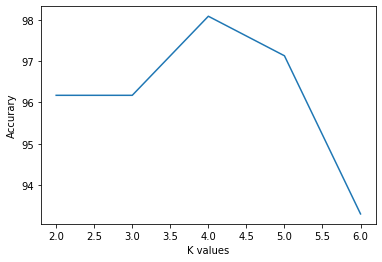

In [19]:
####KNN GRAPH
obj2  = classificationModels()
my_dataframe = obj2.importDataset("breast_cancer_mode_replaced.csv")
k_vals = [i for i in range(2,7)]
for k in k_vals:
    obj2.kNearest(my_dataframe,k,False,4)

print("[INFO]:Plotting the Optimum K value graph")
plt.plot(k_vals,obj2.knn_all)
plt.xlabel("K values")
plt.ylabel("Accurary")
plt.show()
